In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `C:\Users\tge13\Documents\optimal_control_julia\lec_7\Project.toml`


In [1]:
using LinearAlgebra
using Plots

## Define Dynamics

In [2]:
h = 0.1   # time step
A = [ 1 h; 0 1 ]
B = [ 0.5*h*h; h ]

2-element Vector{Float64}:
 0.005000000000000001
 0.1

In [52]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 5.0 # final time #try larger values
N = Int(Tfinal/h) + 1
t_hist = Array(range(0, h*(N-1), step=h));

## Initial state and LQR variables

In [4]:
x0 = [ 1.0; 0 ]
Q = 1.0 * I(2)
R = 0.1
Qn = 1.0 * I(2)

# Julia repeat() ref : https://www.geeksforgeeks.org/creating-array-with-repeated-elements-in-julia-repeat-method/
# repeat(x0, N)

2×2 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅ 
  ⋅   1.0

## Define Cost Function J and Rollout Function

In [5]:
function J(xhist,uhist)
    J = 0.5 * xhist[:,end]' * Qn * xhist[:,end]
    for i in 1:(N-1)
        J = J + 0.5*xhist[:,i]'*Q*xhist[:,i] + 0.5*uhist[i]'*R*uhist[i]
    end
    return J
end

J (generic function with 1 method)

In [6]:
function rollout(xhist, uhist)
    xnew = zeros(n, N)
    xnew[:,1] = xhist[:,1]
    for i in 1:(N-1)
        # caution! xnew is totally new state
        # xnew[:,i+1] = A * xhist[:,i] + B * uhist[i] => (x)
        xnew[:,i+1] = A * xnew[:,i] + B * uhist[i]
    end
    return xnew
end

rollout (generic function with 1 method)

## Shooting Start

In [27]:
xhist = repeat(x0, 1, N)
uhist = zeros(N-1)
Δu = ones(N-1)
λhist = zeros(n, N)

xhist = rollout(xhist, uhist)

J(xhist, uhist)

25.5

## One Step Test

In [20]:
b = 1e-2 #line search tolerance
α = 1.0
iter = 0

#Backward pass to compute λ and Δu
λhist[:,N] .= Qn*xhist[:,N]
for k = N-1:-1:1
    Δu[k] = -(uhist[k]+R\B'*λhist[:,k+1])
    λhist[:,k] .= Q*xhist[:,k] + A'*λhist[:,k+1]
end

#Forward pass with line search to compute x
α = 1.0
unew = uhist + α.*Δu
xnew = rollout(xhist, unew)
while J(xnew, unew) > J(xhist, uhist) - b*α*Δu[:]'*Δu[:]
    @show α
    α = 0.5*α
    unew = uhist + α.*Δu
    xnew = rollout(xhist, unew)
end

α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125


## Shooting Iteration

In [28]:
α = 1.0
β = 1e-2
iter = 0

while maximum(abs.(Δu[:])) > 1e-2 #terminate when the gradient is small
    # Backward Rollout
    λhist[:,end] = Qn*xhist[:,end]
    for i in N-1:-1:1
        Δu[i] = -(uhist[i] + R\B'*λhist[:,i+1])
        λhist[:,i] = Q*xhist[:,i] + A'*λhist[:,i+1]
    end
    
    # Forward Rollout
    α = 1.0
    unew = uhist + α*Δu
    xnew = rollout(xhist, unew)
    while J(xnew, unew) > J(xhist, uhist) - β*α*Δu'*Δu
        @show α
        α = 0.5 * α
        unew = uhist + α*Δu
        xnew = rollout(xhist, unew)
    end
    
    uhist .= unew;
    xhist .= xnew;
    iter += 1
end

@show iter

α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.062

664

## Cost of solution

In [30]:
J(xhist,uhist) 

6.658144576322123

## Plot x1 vs. x2, u vs. t, x vs. t, etc.

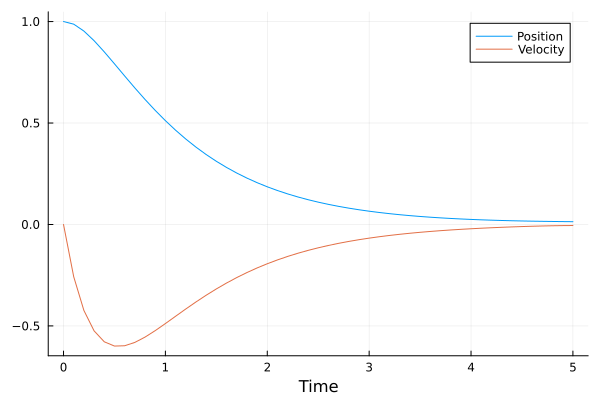

In [38]:
plot(t_hist, xhist[1,:], label="Position")
plot!(t_hist, xhist[2,:], label="Velocity")
xlabel!("Time")

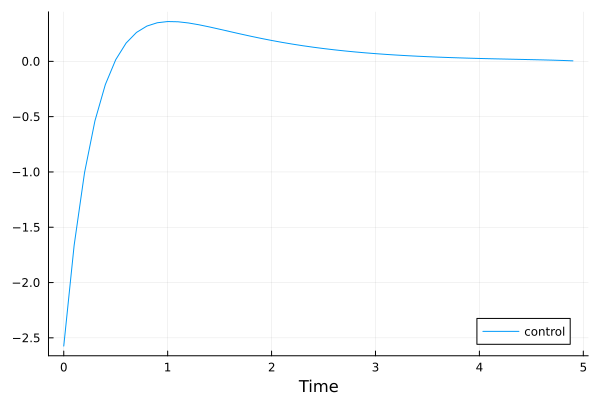

In [39]:
plot(t_hist[1:end-1], uhist, label="control")
xlabel!("Time")

## Experiment - Longer Time

In [53]:
Tfinal = 10.0 # final time #try larger values
N = Int(Tfinal/h)+1    # number of time steps
t_hist = Array(range(0,h*(N-1), step=h));

In [41]:
xhist = repeat(x0, 1, N)
uhist = zeros(N-1)
Δu = ones(N-1)
λhist = zeros(n, N)
xhist = rollout(xhist, uhist)

α = 1.0
β = 1e-2
iter = 0

while maximum(abs.(Δu[:])) > 1e-2 #terminate when the gradient is small
    # Backward Rollout
    λhist[:,end] = Qn*xhist[:,end]
    for i in N-1:-1:1
        Δu[i] = -(uhist[i] + R\B'*λhist[:,i+1])
        λhist[:,i] = Q*xhist[:,i] + A'*λhist[:,i+1]
    end
    
    # Forward Rollout
    α = 1.0
    unew = uhist + α*Δu
    xnew = rollout(xhist, unew)
    while J(xnew, unew) > J(xhist, uhist) - β*α*Δu'*Δu
        @show α
        α = 0.5 * α
        unew = uhist + α*Δu
        xnew = rollout(xhist, unew)
    end
    
    uhist .= unew;
    xhist .= xnew;
    iter += 1
end

α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 0.001953125
α = 0.0009765625
α = 0.00048828125
α = 0.000244140625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 0.001953125
α = 0.0009765625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 0.001953125
α = 0.0009765625
α = 0.00048828125
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 0.001953125
α = 0.0009765625
α = 0.00048828125
α = 0.000244140625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 0.001953125
α = 0.0009765625
α = 0.00048828125
α = 0.000244140625
α = 1.0
α = 0.5
α = 0.25
α = 0.125
α = 0.0625
α = 0.03125
α = 0.015625
α = 0.0078125
α = 0.00390625
α = 0.001953125
α = 0

2416

In [43]:
@show iter
@show J(xhist,uhist)

iter = 2416
J(xhist, uhist) = 6.658621241414695


6.658621241414695

In [48]:
size(xhist)
N

101

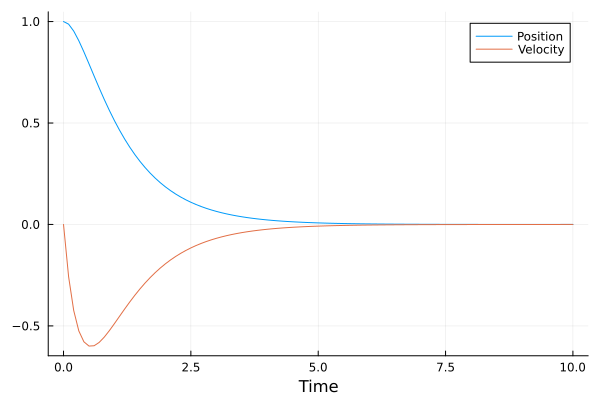

In [54]:
plot(t_hist, xhist[1,:], label="Position")
plot!(t_hist, xhist[2,:], label="Velocity")
xlabel!("Time")

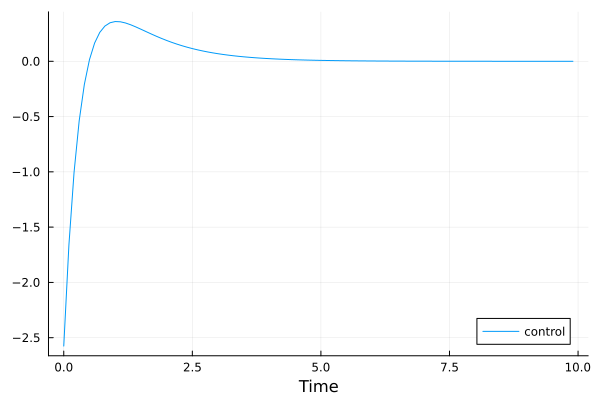

In [55]:
plot(t_hist[1:end-1], uhist, label="control")
xlabel!("Time")

## Experiment2 - Bigger R 

In [65]:
Tfinal = 5.0 # final time #try larger values
N = Int(Tfinal/h) + 1
t_hist = Array(range(0, h*(N-1), step=h));

Q = 1.0 * I(2)
R = 1.0
Qn = 1.0 * I(2)

2×2 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅ 
  ⋅   1.0

In [66]:
xhist = repeat(x0, 1, N)
uhist = zeros(N-1)
Δu = ones(N-1)
λhist = zeros(n, N)
xhist = rollout(xhist, uhist)

α = 1.0
β = 1e-2
iter = 0

while maximum(abs.(Δu[:])) > 1e-2 #terminate when the gradient is small
    # Backward Rollout
    λhist[:,end] = Qn*xhist[:,end]
    for i in N-1:-1:1
        Δu[i] = -(uhist[i] + R\B'*λhist[:,i+1])
        λhist[:,i] = Q*xhist[:,i] + A'*λhist[:,i+1]
    end
    
    # Forward Rollout
    α = 1.0
    unew = uhist + α*Δu
    xnew = rollout(xhist, unew)
    while J(xnew, unew) > J(xhist, uhist) - β*α*Δu'*Δu
        α = 0.5 * α
        unew = uhist + α*Δu
        xnew = rollout(xhist, unew)
    end
    
    uhist .= unew;
    xhist .= xnew;
    iter += 1
end

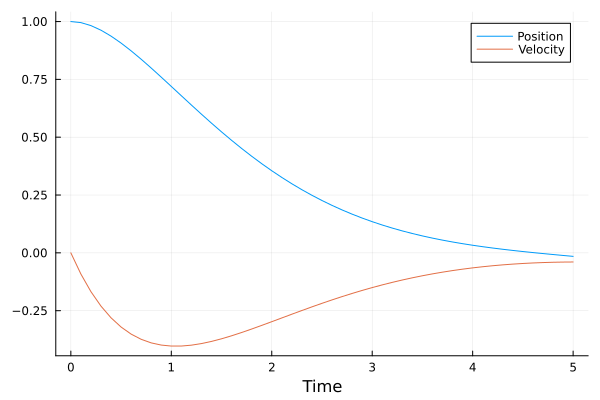

In [67]:
plot(t_hist, xhist[1,:], label="Position")
plot!(t_hist, xhist[2,:], label="Velocity")
xlabel!("Time")

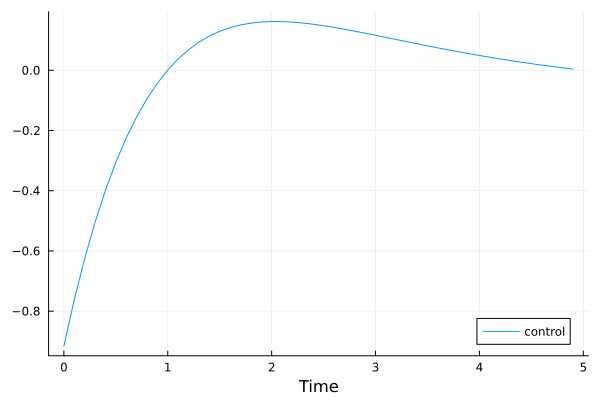

In [68]:
plot(t_hist[1:end-1], uhist, label="control")
xlabel!("Time")

## Experiment2 - Bigger Q

In [73]:
Tfinal = 5.0 # final time #try larger values
N = Int(Tfinal/h) + 1
t_hist = Array(range(0, h*(N-1), step=h));

Q = 10.0 * I(2)
R = 0.1
Qn = 10.0 * I(2)

2×2 Diagonal{Float64, Vector{Float64}}:
 10.0    ⋅ 
   ⋅   10.0

In [74]:
xhist = repeat(x0, 1, N)
uhist = zeros(N-1)
Δu = ones(N-1)
λhist = zeros(n, N)
xhist = rollout(xhist, uhist)

α = 1.0
β = 1e-2
iter = 0

while maximum(abs.(Δu[:])) > 1e-2 #terminate when the gradient is small
    # Backward Rollout
    λhist[:,end] = Qn*xhist[:,end]
    for i in N-1:-1:1
        Δu[i] = -(uhist[i] + R\B'*λhist[:,i+1])
        λhist[:,i] = Q*xhist[:,i] + A'*λhist[:,i+1]
    end
    
    # Forward Rollout
    α = 1.0
    unew = uhist + α*Δu
    xnew = rollout(xhist, unew)
    while J(xnew, unew) > J(xhist, uhist) - β*α*Δu'*Δu
        α = 0.5 * α
        unew = uhist + α*Δu
        xnew = rollout(xhist, unew)
    end
    
    uhist .= unew;
    xhist .= xnew;
    iter += 1
end

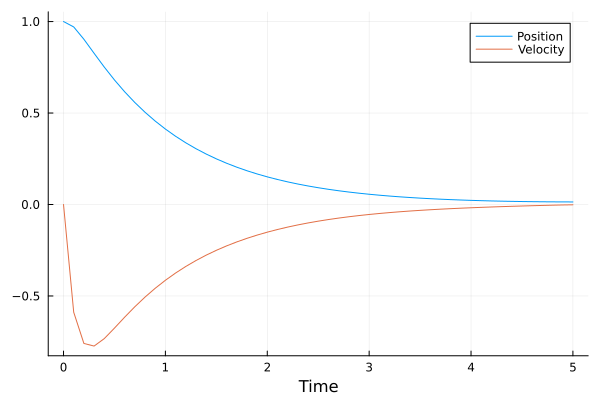

In [75]:
plot(t_hist, xhist[1,:], label="Position")
plot!(t_hist, xhist[2,:], label="Velocity")
xlabel!("Time")

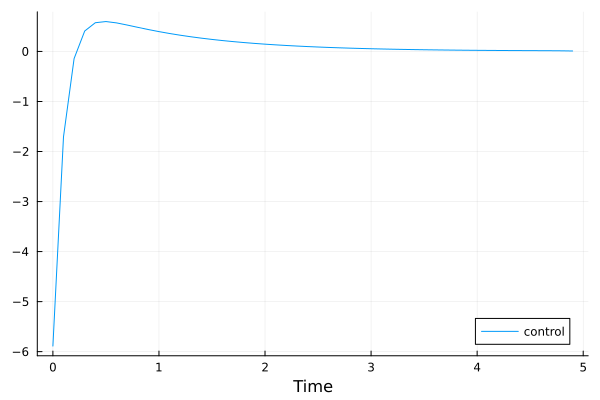

In [76]:
plot(t_hist[1:end-1], uhist, label="control")
xlabel!("Time")